# Importing Required Libraries

In [20]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pan_tompkins import pt
from discrete_wavelet_transform import dwt
from utils import segment_ecg, compare_r_peaks, ecg_info

# Selection of ECG Signals and Annotations File

In [21]:
mat_folder = "database/RAW_ADC"
txt_folder = "database/Text_files"

# Excluded Signals: 214,228,231

# List of record IDs to process (Total 45 Signal)
record_ids = ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '215', '217', '219', '220', '221', '222', '223', '230', '232', '233', '234']

# Data Pre-processing and Feature Extraction
a. Load ECG signal and annotation data

b. Apply Discrete Wavelet Tranform algorithm to detect R-peaks and extract QRS complexes

c. Derive RR intervals and heart rate information

d. Match detected R-peaks with annotations and compare results

e. Segment ECG signals around annotated R-peaks

f. Combine results into a unified DataFrame for each record

In [22]:
# Store all full_df results
all_full_dfs = []

# ========== Processing Loop ==========

for record_id in record_ids:
    
    print(f"\n--- Processing {record_id} ---")
    mat_path = os.path.join(mat_folder, f"{record_id}m.mat")
    txt_path = os.path.join(txt_folder, f"{record_id}.txt")
    
    # Load ECG data
    data = loadmat(mat_path)
    EKG1 = data['val'][0].flatten()
    fs = 360
    # Load annotation
    df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,
                     names=["Time", "Sample#", "Type", "Sub", "Chan", "Num", "Aux"])
    atr_df = df[["Sample#", "Type"]]

    # Apply Pan-Tompkins algorithm
    filtered_ecg, r_wave_locs, qrs_amp_raw = dwt(EKG1, fs, gr=0)
    forward_rri, backward_rri, instant_hr = ecg_info(r_wave_locs, fs)

    # Create detected R-peak DataFrame
    manual_PT = pd.DataFrame({
        "r_wave_locs": r_wave_locs,
        "frri": forward_rri,
        "brri": backward_rri,
        "instant_hr": instant_hr
    })

    # Compare with annotated R-peaks
    res_df, _, _, _ = compare_r_peaks(atr_df, manual_PT, tolerance=20)
    

    # Segment ECG
    segmented = segment_ecg(filtered_ecg, atr_df["Sample#"].to_numpy(), window=180)

    # Combine result
    full_df = pd.concat([res_df, segmented], axis=1)

    full_df["RecordID"] = record_id  # Add ID column for traceability

    # Store for final merge
    all_full_dfs.append(full_df)


--- Processing 100 ---


C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,
c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 101 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 102 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 103 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 104 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 105 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 106 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 107 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 108 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 109 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 111 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 112 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 113 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 114 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 115 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 116 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 117 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 118 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 119 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 121 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 122 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 123 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 124 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 200 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 201 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 202 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 203 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0



--- Processing 205 ---


C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,
c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 207 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 208 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 209 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 210 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 212 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 213 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 215 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 217 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 219 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 220 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 221 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 222 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 223 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 230 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 232 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 233 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_17372\2198612855.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 234 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0


# Merging Processed Data

In [23]:
merged_df = pd.concat(all_full_dfs, ignore_index=True)
print("\n✅ All records merged successfully.")
print(merged_df.head())


✅ All records merged successfully.
   Sample#  Nearest_R_PT  Missed_PT  Diff   frri  brri  instant_hr Type  \
0       18            77          1    59    NaN    77   73.720137    +   
1       77            77          0     0  293.0    77   73.720137    N   
2      370           370          0     0  292.0   293   73.972603    N   
3      662           662          0     0  285.0   292   75.789474    N   
4      946           947          0     1  284.0   285   76.056338    N   

          0         1  ...       351       352       353       354       355  \
0       NaN       NaN  ... -0.007261 -0.005858 -0.004294 -0.002603 -0.000694   
1       NaN       NaN  ... -0.005906 -0.005573 -0.004565 -0.003089 -0.001392   
2 -0.005858 -0.004294  ... -0.003440 -0.003014 -0.002640 -0.002285 -0.001946   
3 -0.002067  0.002252  ... -0.005808 -0.006111 -0.006292 -0.006357 -0.006397   
4 -0.006959 -0.002778  ... -0.002848 -0.001842 -0.000927 -0.000252 -0.000023   

        356       357       358 

# Detection Metrics Calculation

In [24]:
print(f"Total R-waves: {merged_df.shape[0]}")
print(f"Total Detected R-waves: {merged_df.loc[merged_df["Missed_PT"]==0].shape[0]}")
print(f"Total Missed R-waves: {merged_df["Missed_PT"].sum()}")
print(f"Total Error of Detected R-waves: {merged_df.loc[merged_df["Missed_PT"]==0]["Diff"].sum()}")
print(f"Average Deviation on Detected R-waves: {merged_df.loc[merged_df["Missed_PT"]==0]["Diff"].sum()/merged_df.loc[merged_df["Missed_PT"]==0].shape[0]}")

Total R-waves: 104689
Total Detected R-waves: 98776
Total Missed R-waves: 5913
Total Error of Detected R-waves: 127102
Average Deviation on Detected R-waves: 1.2867700656029806


# Feature Selection for Model Training

In [25]:
training_dataset = merged_df.drop(columns=["RecordID","Sample#", "Nearest_R_PT", "Diff"])
training_dataset = training_dataset.loc[training_dataset["Missed_PT"]==0]
training_dataset = training_dataset.drop(columns=["Missed_PT"])
training_dataset.columns = training_dataset.columns.astype(str)

In [26]:
training_dataset.columns

Index(['frri', 'brri', 'instant_hr', 'Type', '0', '1', '2', '3', '4', '5',
       ...
       '350', '351', '352', '353', '354', '355', '356', '357', '358', '359'],
      dtype='object', length=364)

# Exclusion of Problematic Beats

In [27]:
training_dataset = training_dataset.loc[
    ~(
        (training_dataset['frri'] == 0) |
        (training_dataset['brri'] == 0) |
        (training_dataset['frri'].isna())|
        (training_dataset['brri'].isna())|
        (training_dataset['instant_hr'] == 0)|
        (training_dataset['0'].isna())|
        (training_dataset['359'].isna())
    )
]



# Arrhythmia Class Distribution Analysis

In [28]:
print(training_dataset.shape)
training_dataset["Type"].value_counts()

(98207, 364)


Type
N    70038
/     6974
R     5852
V     5822
L     4629
A     2332
f      964
F      778
j      224
!      198
a      135
E      101
J       80
|       33
Q       20
e       16
+        5
~        4
S        2
Name: count, dtype: int64

# Type Selection For Model Training
--> Among all these labels we select the labels needed for our project and save it as the main_types and other as the "Other"

--> We peaked top 6 Types training.

A - Atrial Premature Contraction (APC)

L - Left Bundle branch Block Beat (LBB)

/ - Paced Beat

V - Premature Ventricular Contraction (PVC)

R - Right Bundle Branch Block Beat (RBB)

N - Normal Beat

In [29]:
main_types = ['A', 'L', '/', 'V', 'R', 'N']

# Replace all types not in your main_types with "Other"
training_dataset["Type"] = training_dataset["Type"].apply(
    lambda x: x if x in main_types else "Other"
)

# Now, count each type (including "Other" as a single type)
training_dataset["Type"].value_counts()


Type
N        70038
/         6974
R         5852
V         5822
L         4629
Other     2560
A         2332
Name: count, dtype: int64

C:\Users\redow\AppData\Local\Temp\ipykernel_17372\4172905.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(len(x), target_size), random_state=42))


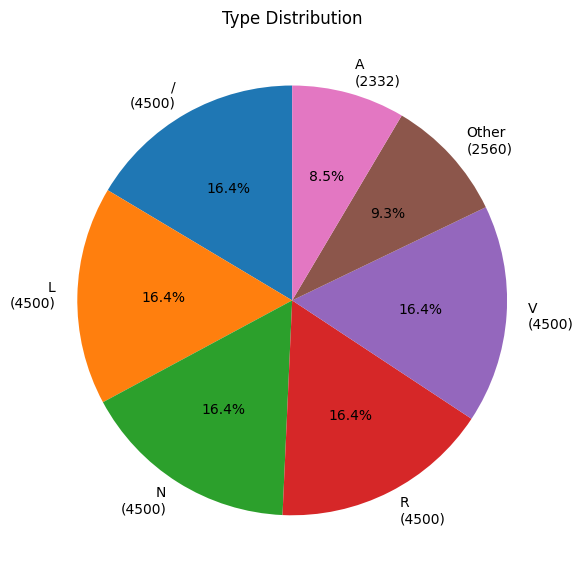

In [30]:
target_size = 4500

training_dataset = (
    training_dataset.groupby("Type")
    .apply(lambda x: x.sample(n=min(len(x), target_size), random_state=42))
    .reset_index(drop=True)
)


counts = training_dataset["Type"].value_counts()
labels = [f'{idx}\n({val})' for idx, val in zip(counts.index, counts.values)]  # Add counts in labels

plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=labels,
    autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
    startangle=90
)
plt.title("Type Distribution")
plt.tight_layout()
plt.show()

Final Training Dataset

In [31]:
training_dataset

,frri,brri,instant_hr,Type,0,1,2,3,4,5,...,350,351,352,353,354,355,356,357,358,359
0,303.0,312,71.287129,/,0.047549,0.049385,0.050723,0.051971,0.053416,0.055608,...,-0.010169,-0.010890,-0.011459,-0.011666,-0.011631,-0.011544,-0.011441,-0.011482,-0.011668,-0.011922
1,301.0,301,71.760797,/,-0.010725,-0.003616,0.003519,0.010601,0.017451,0.024120,...,-0.001834,-0.003972,-0.006636,-0.009346,-0.011456,-0.012470,-0.011758,-0.009645,-0.006913,-0.004041
2,296.0,286,72.972973,/,0.001985,0.006794,0.011883,0.017303,0.022849,0.028276,...,-0.003491,-0.004682,-0.005502,-0.005580,-0.004925,-0.003848,-0.002358,-0.000697,0.000911,0.002274
3,281.0,286,76.868327,/,-0.026099,-0.023765,-0.020380,-0.016036,-0.011245,-0.005957,...,-0.001634,0.001786,0.004641,0.006416,0.006252,0.004032,0.000381,-0.004533,-0.009916,-0.014727
4,323.0,302,66.873065,/,0.115231,0.111320,0.105944,0.098796,0.090086,0.080506,...,-0.041558,-0.038539,-0.034736,-0.030669,-0.026671,-0.023284,-0.020517,-0.018130,-0.016124,-0.014184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27387,336.0,171,64.285714,V,0.170215,0.081440,-0.001386,-0.068254,-0.113357,-0.135333,...,-0.011681,-0.010366,-0.008446,-0.006637,-0.005207,-0.004348,-0.004140,-0.004298,-0.004607,-0.004596
27388,323.0,177,66.873065,V,0.428167,0.519531,0.593313,0.635225,0.634649,0.586288,...,-0.003844,-0.003768,-0.002551,-0.000920,0.000761,0.001567,0.001336,0.000120,-0.001752,-0.003302
27389,97.0,120,222.680412,V,0.034033,0.033408,0.030256,0.025865,0.020738,0.015856,...,0.001483,0.001599,0.000435,-0.001634,-0.004163,-0.006260,-0.007509,-0.007461,-0.006171,-0.004191
27390,277.0,189,77.978339,V,0.115042,0.065092,0.011120,-0.043084,-0.092697,-0.133272,...,-0.006223,-0.005602,-0.004039,-0.001673,0.001069,0.004063,0.006924,0.009644,0.012386,0.015202


# Splitting Training Dataset 


In [32]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = training_dataset.drop(columns=["Type"])
y = training_dataset["Type"]

# Split into train (80%) and temp (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Distribution of Training and Validation Dataset

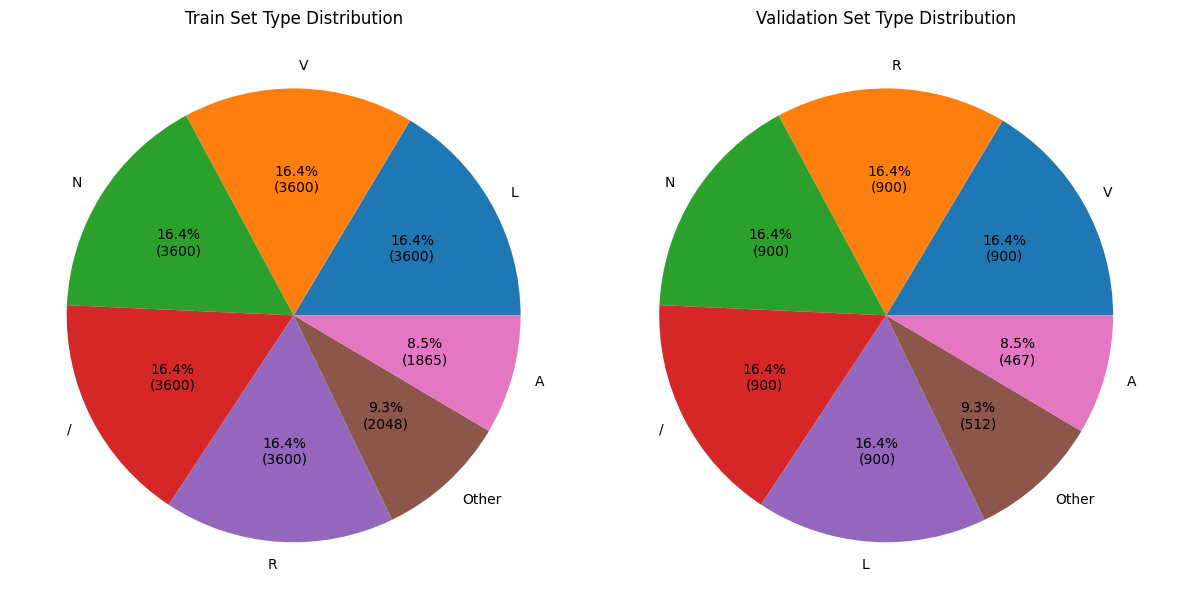

In [33]:
import matplotlib.pyplot as plt

# Get counts
train_counts = y_train.value_counts()
val_counts = y_val.value_counts()

# Autopct function to show % and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return my_autopct

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training pie chart
train_counts.plot(
    kind='pie',
    autopct=make_autopct(train_counts),
    ax=axes[0],
    title='Train Set Type Distribution'
)
axes[0].set_ylabel('')  # Optional: remove y-axis label

# Validation pie chart
val_counts.plot(
    kind='pie',
    autopct=make_autopct(val_counts),
    ax=axes[1],
    title='Validation Set Type Distribution'
)
axes[1].set_ylabel('')

# Layout adjustment
plt.tight_layout()
plt.show()


# Configuring SVM Multi-class Classifier Model

In [34]:
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create SVM pipeline with scaling
svm_clf = make_pipeline(
    StandardScaler(),       # Standardize features
    SVC(kernel='rbf', C=10, gamma='scale', random_state=42, class_weight='balanced')
)

# Fitting Training Dataset and Prediciting Validation Dataset

In [35]:
# Fit on training data
svm_clf.fit(X_train, y_train)

# Predict on training and validation data
y_train_pred = svm_clf.predict(X_train)
y_val_pred = svm_clf.predict(X_val)

Saving the Model in Pickle Format for Future Use

In [36]:
import pickle

with open('model_dwt.pkl', 'wb') as f:
    pickle.dump(svm_clf, f)


# Accuracy Metrics

In [37]:
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score
from sklearn.metrics import classification_report

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}\n")

# print("=== Weighted Average Metrics ===")
# print(f"Precision: {precision_score(y_val, y_val_pred, average='weighted'):.4f}")
# print(f"Recall: {recall_score(y_val, y_val_pred, average='weighted'):.4f}")
# print(f"F1 Score: {f1_score(y_val, y_val_pred, average='weighted'):.4f}\n")

# print("=== Macro Average Metrics ===")
# print(f"Precision: {precision_score(y_val, y_val_pred, average='macro'):.4f}")
# print(f"Recall: {recall_score(y_val, y_val_pred, average='macro'):.4f}")
# print(f"F1 Score: {f1_score(y_val, y_val_pred, average='macro'):.4f}")

print("\n                   === Per-Class Metrics ===")
print(classification_report(y_val, y_val_pred, digits=4))


Train Accuracy: 0.9956
Validation Accuracy: 0.9719


                   === Per-Class Metrics ===
              precision    recall  f1-score   support

           /     0.9945    0.9967    0.9956       900
           A     0.9400    0.9400    0.9400       467
           L     1.0000    0.9989    0.9994       900
           N     0.9739    0.9533    0.9635       900
       Other     0.9194    0.8906    0.9048       512
           R     0.9989    0.9978    0.9983       900
           V     0.9390    0.9756    0.9569       900

    accuracy                         0.9719      5479
   macro avg     0.9665    0.9647    0.9655      5479
weighted avg     0.9720    0.9719    0.9718      5479



# Confusion Matrix

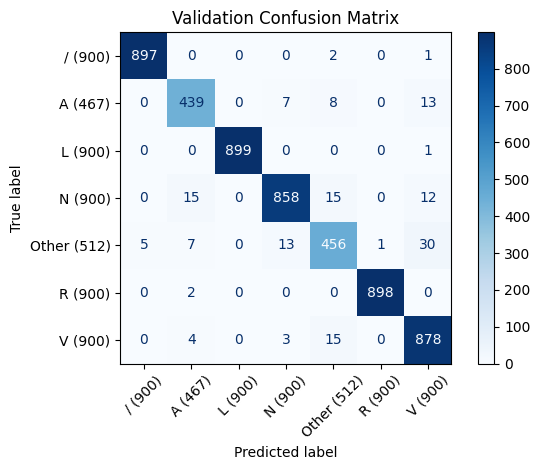

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_val_pred, labels=labels)

# Compute counts for each true label (sum of each row)
counts = cm.sum(axis=1)
# Update display labels to show count (e.g., 'N (1000)')
display_labels = [f"{lbl} ({cnt})" for lbl, cnt in zip(labels, counts)]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Validation Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()
